In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.shape

(244, 7)

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [7]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [12]:
df.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

In [15]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


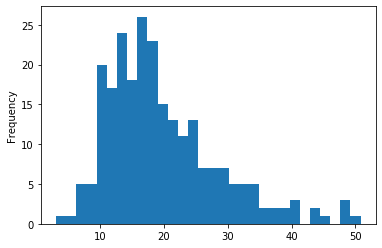

In [20]:
df.total_bill.plot.hist(bins=30)

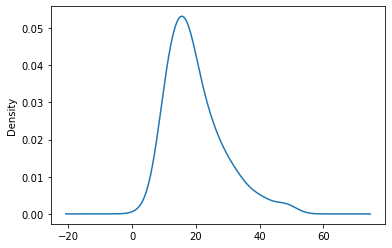

In [21]:
df.total_bill.plot.kde()

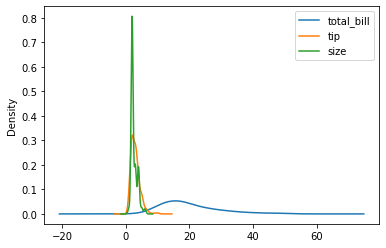

In [22]:
df.plot.kde()

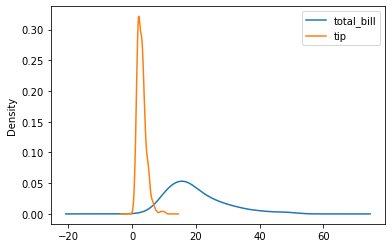

In [23]:
df[['total_bill', 'tip']].plot.kde()

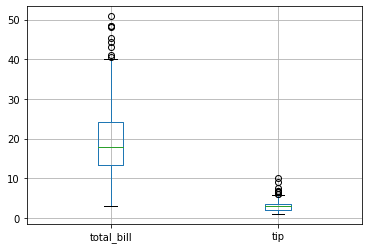

In [25]:
df[['total_bill', 'tip']].plot.box(grid=True)

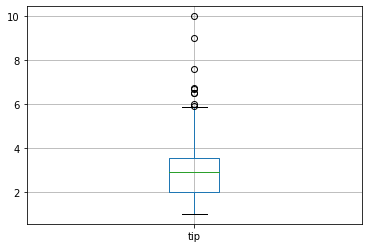

In [27]:
df[['tip']].plot.box(grid=True)

In [ ]:
#corr
#sns.pairplot()

In [28]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


C:\Users\Teacher\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


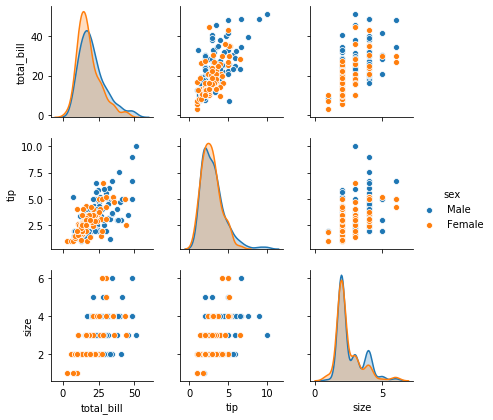

In [35]:
_=sns.pairplot(df, size = 2, hue='sex')

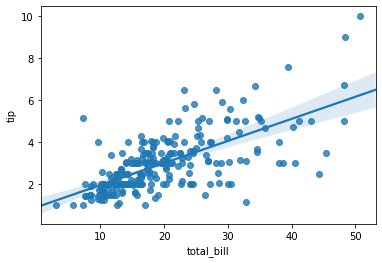

In [37]:
_=sns.regplot(df.total_bill, df.tip)

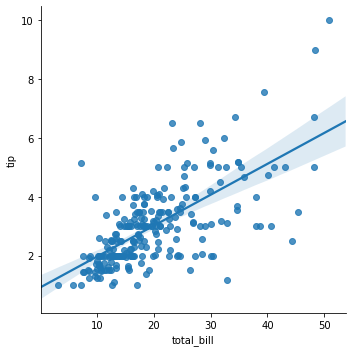

In [40]:
# ALT
_=sns.lmplot('total_bill', 'tip', df)

In [41]:
#try value_counts()

In [42]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [44]:
df['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [45]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

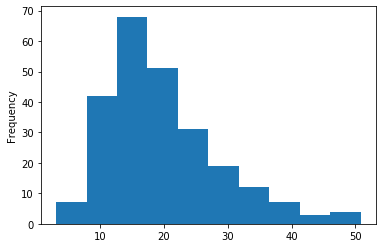

In [49]:
df.total_bill.plot.hist()

In [55]:
# df.total_bill.value_counts()

In [56]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

## BASIC GROUPBY -> UNDERSTANDING

In [57]:
#more tips on dinner? show in bar plot

In [58]:
df.groupby('time')

In [59]:
df.groupby('time')['tip']

In [60]:
df.groupby('time')['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

In [61]:
type(df.groupby('time')['tip'].mean())

pandas.core.series.Series

In [62]:
df.groupby('time')['tip'].mean().index

CategoricalIndex(['Lunch', 'Dinner'], categories=['Lunch', 'Dinner'], ordered=False, name='time', dtype='category')

In [63]:
df.groupby('time')['tip'].mean().values

array([2.72808824, 3.10267045])

In [64]:
#when ppl are more "mefargenim"?

In [65]:
# THIS IS NOT RIGHT!!!
df['tip_per_person'] = df.tip / df.size

In [66]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.000591
1,10.34,1.66,Male,No,Sun,Dinner,3,0.000972
2,21.01,3.50,Male,No,Sun,Dinner,3,0.002049
3,23.68,3.31,Male,No,Sun,Dinner,2,0.001938
4,24.59,3.61,Female,No,Sun,Dinner,4,0.002114


In [67]:
df.size

1952

In [68]:
# DO THIS
df['tip_per_person'] = df.tip / df['size']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500


In [69]:
df['bill_per_person'] = df.total_bill / df['size']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person,bill_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,6.147500


In [70]:
df['tip_ratio'] = df.tip_per_person / df.bill_per_person
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person,bill_per_person,tip_ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,8.495000,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,3.446667,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,7.003333,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,11.840000,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,6.147500,0.146808


In [76]:
df.groupby('time')['tip_ratio'].mean()

time
Lunch     0.164128
Dinner    0.159518
Name: tip_ratio, dtype: float64

In [75]:
round(100*df.groupby('time')['tip_ratio'].mean(),1)

time
Lunch     16.4
Dinner    16.0
Name: tip_ratio, dtype: float64

## AGG -> LIKE BASIC GROUPBY WITH MORE METRICS

In [77]:
# find for tip_ratio the min, max, median by grouping time
# bar plot it

In [108]:
df.groupby('time')['tip_ratio'].aggregate(['min', 'max', np.median, 'mean'])

,min,max,median,mean
time,,,,
Lunch,0.072961,0.266312,0.154084,0.164128
Dinner,0.035638,0.710345,0.155400,0.159518


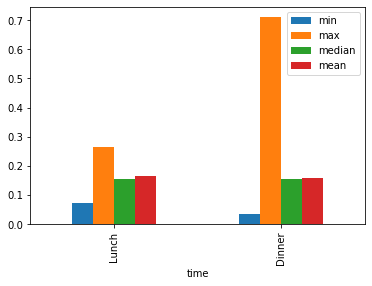

In [109]:
df.groupby('time')['tip_ratio'].aggregate(['min', 'max', np.median, 'mean']).plot.bar()

## FILTERING - DROP DATA  - filter(keep) _days_ with max bill < 45

In [85]:
df.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [86]:
df.groupby('day')['total_bill'].max()

day
Thur    43.11
Fri     40.17
Sat     50.81
Sun     48.17
Name: total_bill, dtype: float64

In [ ]:
#non groupby filter (by records)

In [90]:
df2 = df[df.total_bill < 45]
print(df.shape)
df2.shape

(244, 10)


(239, 10)

In [99]:
def my_filter(x):
    return x['total_bill'].max() < 45
    
filtered = df.groupby('day').filter(my_filter)
print(filtered.shape)
filtered.head()

(81, 10)


,total_bill,tip,sex,smoker,day,time,size,tip_per_person,bill_per_person,tip_ratio
77,27.20,4.00,Male,No,Thur,Lunch,4,1.000,6.800,0.147059
78,22.76,3.00,Male,No,Thur,Lunch,2,1.500,11.380,0.131810
79,17.29,2.71,Male,No,Thur,Lunch,2,1.355,8.645,0.156738
80,19.44,3.00,Male,Yes,Thur,Lunch,2,1.500,9.720,0.154321
81,16.66,3.40,Male,No,Thur,Lunch,2,1.700,8.330,0.204082


In [94]:
filtered.day.unique()

[Thur, Fri]
Categories (2, object): [Thur, Fri]

In [97]:
filtered = df.groupby('day').filter(lambda x: x['total_bill'].max() < 45)
filtered.shape

(81, 10)

In [106]:
filtered = df.groupby('day')[['total_bill', 'day']].filter(lambda x: x['total_bill'].max() < 45)[['day']]
filtered.head()

,day
77,Thur
78,Thur
79,Thur
80,Thur
81,Thur


In [107]:
filtered = df.groupby('day')[['total_bill', 'day', 'tip']].filter(lambda x: x['total_bill'].max() < 45)[['tip']]
filtered.head()

,tip
77,4.00
78,3.00
79,2.71
80,3.00
81,3.40


In [110]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person,bill_per_person,tip_ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,8.495000,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,3.446667,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,7.003333,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,11.840000,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,6.147500,0.146808


## TRANSFORM - OPERATE TRANSFORMATION ON A GROUP, *** SIZE REMAINS ** 

In [111]:
# for each records, calculate the diff of the tip from the 
# median of each day's tip

In [118]:
df.groupby('day')['tip'].transform(lambda x: x- x.median()).shape

(244,)

In [122]:
df.shape

(244, 10)

In [ ]:
#do with with func instead of lambda

In [123]:
def my_transform(x):
    return x- x.median() 

In [124]:
df.groupby('day')['tip'].transform(my_transform).shape

(244,)

In [ ]:
# add this feature to df, name it as you want

In [125]:
df['tips_minus_media'] = df.groupby('day')['tip'].transform(my_transform)

In [126]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person,bill_per_person,tip_ratio,tips_minus_media
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,8.495000,0.059447,-2.14
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,3.446667,0.160542,-1.49
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,7.003333,0.166587,0.35
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,11.840000,0.139780,0.16
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,6.147500,0.146808,0.46


## APPLY - MORE FLEXABILITY FOR FEATURE ENGINEERING. Get group of data and do whatever you want with it. usually for data/feature engineering

In [127]:
# new feature - smart_tip - for each day of week - this will
# be the ratio between tip_per_person to mean of tip_per_person

In [133]:
def be_smarter(x):
    x['smart_tip'] = x['tip_per_person'] / x['tip_per_person'].mean()
    return x
    
smarter = df.groupby('day').apply(be_smarter)

In [134]:
smarter.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person,bill_per_person,tip_ratio,tips_minus_media,smart_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,8.495000,0.059447,-2.14,0.416316
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,3.446667,0.160542,-1.49,0.456161
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,7.003333,0.166587,0.35,0.961785
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,11.840000,0.139780,0.16,1.364361
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,6.147500,0.146808,0.46,0.744010


In [135]:
smarter.shape

(244, 12)

In [136]:
smarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
total_bill          244 non-null float64
tip                 244 non-null float64
sex                 244 non-null category
smoker              244 non-null category
day                 244 non-null category
time                244 non-null category
size                244 non-null int64
tip_per_person      244 non-null float64
bill_per_person     244 non-null float64
tip_ratio           244 non-null float64
tips_minus_media    244 non-null float64
smart_tip           244 non-null float64
dtypes: category(4), float64(7), int64(1)
memory usage: 16.8 KB


In [137]:
# calculate skew (mean-media) for each day of feture tip_per_person
# use apply func

In [138]:
def get_skews(x):
    mean_per_day = x.mean()
    median_per_day = x.median()
    return mean_per_day - median_per_day

In [139]:
skews = df.groupby('day')['tip_per_person'].apply(get_skews)

In [140]:
skews

day
Thur    0.176815
Fri     0.079342
Sat     0.197692
Sun     0.046355
Name: tip_per_person, dtype: float64